# 4.8 Data Visualization with Python

# Contents :
1. Importing libraries and data
2. Creating Visualizations
3. Exporting Visualizations

# 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Path to data folder
path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 4 Python (Instacart Basket Analysis)\02 Data'

In [4]:
# Import merged data
merged_data = pd.read_pickle(os.path.join(path, 'prepared data', 'data merged.pkl'))

In [5]:
merged_data.head()

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,income,Unnamed: 0_x,...,price_range_loc,busiest day,busiest days,Busiest hours,max_order,loyalty_flag,avg_prices,spending_flag,order_frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443895,...,Mid range product,Regularly Busy Day,Busiest Days,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443897,...,Mid range product,Regularly Busy Day,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443898,...,Mid range product,Regularly Busy Day,Busiest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443892,...,Mid range product,Regularly Busy Day,Regularly Busy,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443893,...,Mid range product,Regularly Busy Day,Slowest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer


In [6]:
merged_data.shape

(30629741, 34)

# 2. Creating Visualizations

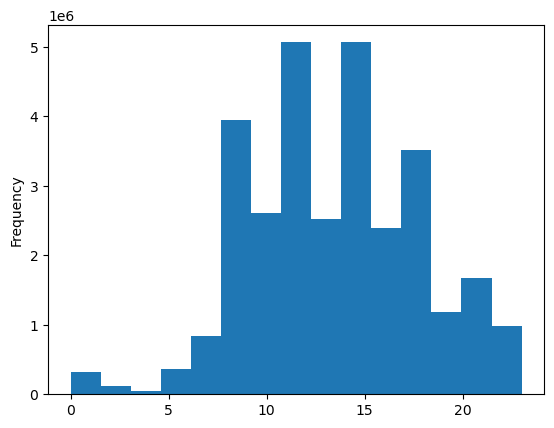

In [7]:
# Histogram for order hour of day

order_hour_hist = merged_data['hour_of_day_ordered'].plot.hist(bins = 15)

# The histogram shows that most orders are placed in the middle of the chart or from around 9am to around 5pm.  

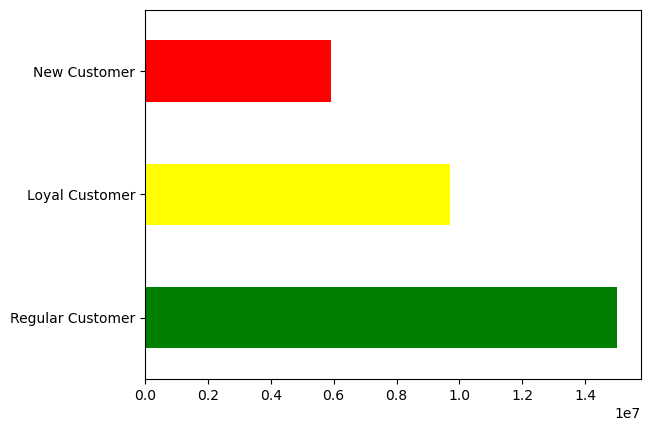

In [8]:
# Bar Chart for loyalty_flag

loyalty_flag_bar = merged_data['loyalty_flag'].value_counts().plot.barh(color = ['green', 'yellow', 'red'])

In [9]:
# Changing outliers to NaNs
merged_data.loc[merged_data['prices'] >100, 'prices'] = np.nan

In [10]:
merged_data['prices'].max()

25.0

In [11]:
# Creating random sample 
np.random.seed(5)
dev = np.random.rand(len(merged_data)) <= 0.7

In [12]:
# Splitting Data
big = merged_data[dev]
small = merged_data[~dev]


In [13]:
# Check
len(big) + len(small)

30629741

In [14]:
merged_data.shape

(30629741, 34)

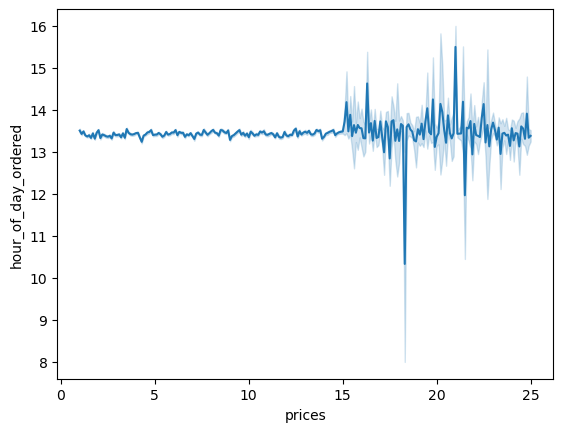

In [15]:
# Creating a line chart
line_prices_vs_order_hour = sns.lineplot(data = small, x = 'prices', y = 'hour_of_day_ordered')

In [16]:
# Creating data set from random sample with only relavent columns
df_2 = small[['Age', 'n_dependants']]

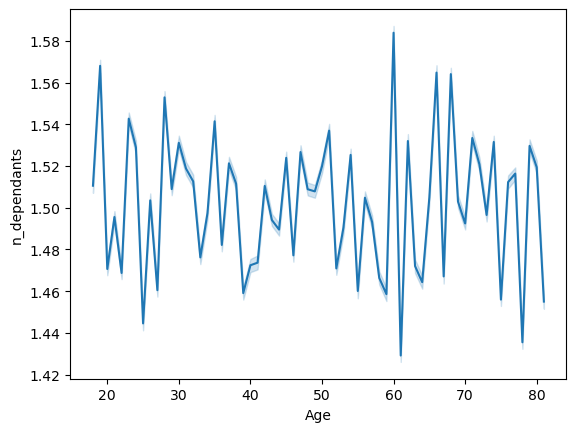

In [18]:
line_age_vs_dependants = sns.lineplot(data = merged_data, x = 'Age', y = 'n_dependants')

# The line chart is showing there is no noticeable connection between age and number of dependants

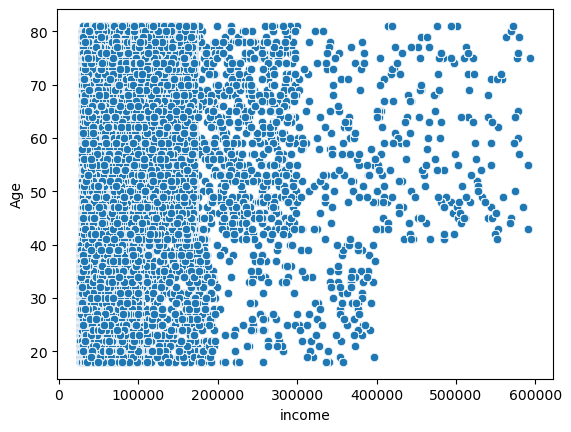

In [19]:
scatterplot_income_vs_age = sns.scatterplot(data = merged_data, x = 'income', y = 'Age')

# The Scatterplot is showing the data is left scewed meaning most peoples income is on the lower side of the chart however there is not really a relationship between age and income.

In [20]:
# Path to visualizations folder
path_2 = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 4 Python (Instacart Basket Analysis)\Visualizations'

# 3. Exporting Visualizations

In [21]:
order_hour_hist.figure.savefig(os.path.join(path_2, 'order_hour_histogram.png'))

In [22]:
loyalty_flag_bar.figure.savefig(os.path.join(path_2, 'loyalty_flag_bar_chart.png'), bbox_inches = 'tight')

In [23]:
line_prices_vs_order_hour.figure.savefig(os.path.join(path_2, 'Prices_vs_order_hour_line_chart.png'))

In [24]:
line_age_vs_dependants.figure.savefig(os.path.join(path_2, 'age_vs_dependants_line_chart.png'))

In [25]:
scatterplot_income_vs_age.figure.savefig(os.path.join(path_2, 'income_vs_age_scatterplot.png'))